<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/punto1_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

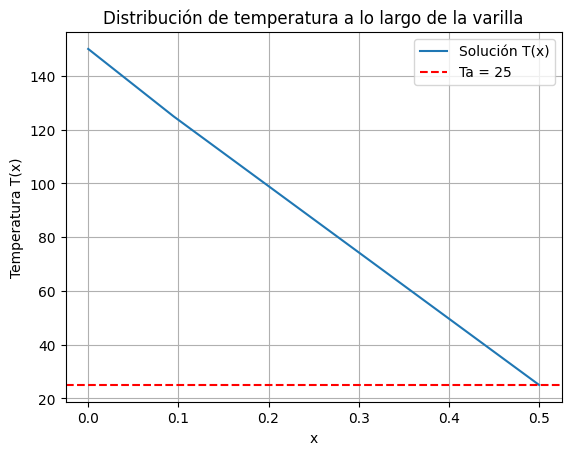

El valor óptimo de dT/dx(0) es: -270.494587837236


In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

L = 0.5  # Longitud de la aleta en metros
T0 = 150  # Temperatura en la base (x=0) en °C
T_inf = 25  # Temperatura ambiente en °C
h = 10  # Coeficiente de transferencia de calor por convección en W/m^2·K
P = 0.1  # Perímetro de la aleta en metros
k = 200  # Conductividad térmica en W/m·K
A = 0.005  # Área de la sección transversal en m^2

# Definir el sistema de ecuaciones diferenciales
def sistema_ecuaciones(x, y, h, P, k, A, T_inf): # Definición del sistema de ecuaciones diferenciales
    T, dTdx = y  # Descomponer la solución en temperatura y su derivada
    dydx = [dTdx, h * P / (k * A) * (T - T_inf)]  # Ecuación diferencial de segundo orden descompuesta
    return dydx

# Función para disparar (shooting method)
def disparo(dT0):
    # Convertimos dT0 a escalar si es una lista o array
    dT0 = np.asarray(dT0).item()  # Esto asegura que sea un escalar
    # Condiciones iniciales [T(0), dT/dx(0)]
    y0 = [T0, dT0]
    # Resolver la ODE desde 0 hasta L
    sol = solve_ivp(sistema_ecuaciones, [0, L], y0, args=(h, P, k, A, T_inf), dense_output=True)
    # Return the temperature at the end of the fin (x=L)
    return sol

# Función de error que compara T(L) con la condición deseada
def error_shooting(dT0):
    sol = disparo(dT0)
    T_L = sol.y[0, -1]  # Valor de T en x=L
    return abs(T0-T_inf)  # Usamos valor absoluto para evitar valores negativos
result = root_scalar(lambda dT0: disparo(dT0).y[0, -1] - T_inf, bracket=[-500, 500], method='bisect')  # Pass a lambda function that returns the temperature difference
derivada_inicial = result.root
# Minimizar el error usando fmin (ajustar el valor inicial dT0)
sol_shooting = fmin(error_shooting, derivada_inicial, disp=False)  # Se inicia con un valor escalar

# Obtener la solución final usando el valor de dT/dx(0) obtenido
sol_final = disparo(sol_shooting[0])

# Graficar la solución
x_vals = sol_final.t
T_vals = sol_final.y[0]

plt.plot(x_vals, T_vals, label=f"Solución T(x)")
plt.xlabel('x')
plt.ylabel('Temperatura T(x)')
plt.title('Distribución de temperatura a lo largo de la varilla')
plt.axhline(y=T_inf, color='r', linestyle='--', label=f'Ta = {T_inf}')
plt.legend()
plt.grid(True)
plt.show()

# Devolver el valor óptimo de dT/dx(0)
print(f"El valor óptimo de dT/dx(0) es: {sol_shooting[0]}")
